Lilianna Houston

Updated: 9/14/21

Gillespie Simulation 

Max Entropy Project

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import random

Basic Gillespie Simulation: We have two different reactions, A->B and B->A with rates k_f and k_b respectively. At time t = 0, we have n_a and n_b number of A and B molecules. The probability of each reaction, combined with a random reaction and random time variable, determine which reaction happens, when. As time progresses, the numbers of A and B molecules flucuate; sometimes forming a pattern.

## Example A2: Positive feedback circuit - no dimer

In this example, we have 5 reactions. 1) Protein production, 2) protein degradation, 3/4) gene activation/deactivation, 7) activated protein production.

I modeled this example with the master equation, as well.

In [9]:
# CONSTANTS
# g = rate of basic protein production
g = 5.0*10**(-3) # 1/s
# r = rate of protein degradation
r = 1.0*10**(-3) # 1/s

# f = forward bind rate to activate gene
f = 6.0*10**(-3) # 1/s
# b = backward bind rate to deactivate gene
b = 3.0*10**(-5) # 1/s

# g_star = rate rate of activated protein production
g_star = 50.0*10**(-3) # 1/s

In [39]:
# INITIAL CONDITION of CHANGING VARIABLES

proteins = []
times = []

#unactived (1)/actived (0) gene
gene = 1

# Number of Proteins
n_a = 0

base_time = 0

main()

In [38]:
def main():
    global gene, n_a, base_time
    i = 0
    while base_time < 10**6:
        # Random reaction variable
        rand_r = random.uniform(0, 1)
        # Random time variable
        rand_t = random.uniform(0, 1) 
        
        # Propensities
        # 1) Protein production 
        a1 = gene * g
        # 2) protein degradation
        a2 = n_a * r
        # 5) gene activation 
        a3 = gene * n_a * f
        # 6) gene deactivation
        a4 = (1 - gene) * b
        # 7) activated protein production
        a5 = (1 - gene) * g_star
        
        # Def vector of propensities
        props = np.array([a1, a2, a3, a4, a5])
        # Def vector of probabilities
        probs = props/np.sum(props) 
        # Calculate random time
        time = 1/(np.sum(props))*np.log(1/rand_t)
        base_time += time
        
        react = deter_reaction(rand_r, probs)
        
        if react != 0:
            reaction_switch(react)
        #print ("i:", i, "unactive gene:", n_g_ua, "active gene:", n_g_a, "proteins:", n_a, "dimers:", n_a2)        
        proteins.append(n_a)
        times.append(base_time)
        i += 1
        
    #print ("proteins:", proteins)
    #print ("base_time:", times)

In [29]:
# Probability Generator (useless tbh)
def prob_gen(prop):
    p = props[prop - 1] / np.sum(props)
    return (p)

In [28]:
# Reaction Selector 
def deter_reaction(rand_r, probs):
    c = 0
    s = 0
    while c < (len(probs) + 1):
        if s > rand_r:
            return c
        else:
            s += probs[c]
            c += 1
    return 0

In [27]:
##, gene, n_g_ua, n_g_a, n_a, n_a2
def reaction_switch(react):
    if react == 1:
        react_1()
    elif react == 2:
        react_2()
    elif react == 3:
        react_3()
    elif react == 4:
        react_4()
    elif react == 5:
        react_5()

In [32]:
def react_1():
    global gene, n_a
    n_a += 1
def react_2():
    global gene, n_a
    n_a -= 1
def react_3():
    global gene, n_a
    n_a -= 1
    gene -= 1
def react_4():
    global gene, n_a
    n_a += 1
    gene += 1
def react_5():
    global gene, n_a
    n_a += 1

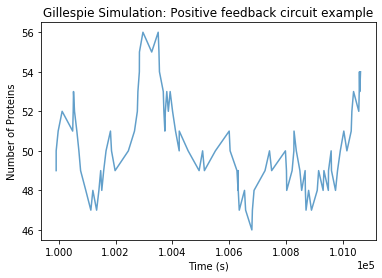

In [43]:
# plot
plt.plot(times[10000:10100], proteins[10000:10100], alpha=.7)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.xlabel("Time (s)")
plt.ylabel("Number of Proteins")
plt.title("Gillespie Simulation: Positive feedback circuit example")
plt.show()

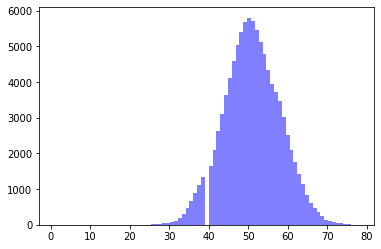

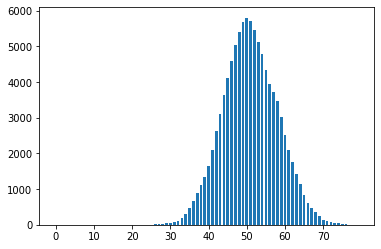

[0.000e+00 2.000e+00 2.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00
 1.000e+00 1.000e+00 1.000e+00 2.000e+00 4.000e+00 3.000e+00 1.000e+00
 1.000e+00 2.000e+00 4.000e+00 3.000e+00 3.000e+00 6.000e+00 6.000e+00
 7.000e+00 6.000e+00 5.000e+00 7.000e+00 8.000e+00 1.400e+01 2.300e+01
 3.500e+01 4.500e+01 6.200e+01 8.100e+01 1.100e+02 1.910e+02 3.150e+02
 4.810e+02 6.770e+02 8.970e+02 1.115e+03 1.348e+03 1.657e+03 2.094e+03
 2.625e+03 3.114e+03 3.628e+03 4.117e+03 4.580e+03 5.046e+03 5.408e+03
 5.698e+03 5.807e+03 5.711e+03 5.460e+03 5.135e+03 4.791e+03 4.336e+03
 3.960e+03 3.734e+03 3.461e+03 3.023e+03 2.507e+03 2.104e+03 1.755e+03
 1.426e+03 1.134e+03 8.460e+02 6.130e+02 4.630e+02 3.590e+02 2.330e+02
 1.430e+02 1.030e+02 6.700e+01 5.400e+01 4.300e+01 2.500e+01 1.000e+01
 6.000e+00 3.000e+00 0.000e+00]


In [105]:
n, bins, patches = plt.hist(proteins, 79, facecolor='blue', alpha=0.5)
plt.show()

bin_edges = np.arange(-.5, 80.5, 1)
hist = plt.hist(proteins, bins = bin_edges, rwidth = 0.7)
plt.xticks(np.arange(0, 80, 10))
plt.show()
print(hist[0])

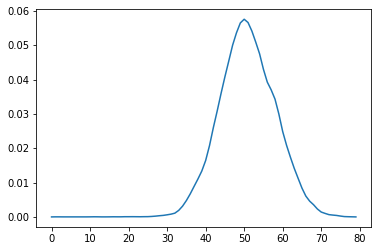

In [106]:
totals = hist[0]/sum(hist[0])
plt.plot(range(80), totals)
plt.show()

In [110]:
print(totals.tolist())

[0.0, 1.9850722566301414e-05, 1.9850722566301414e-05, 9.925361283150707e-06, 9.925361283150707e-06, 9.925361283150707e-06, 9.925361283150707e-06, 9.925361283150707e-06, 9.925361283150707e-06, 9.925361283150707e-06, 1.9850722566301414e-05, 3.970144513260283e-05, 2.977608384945212e-05, 9.925361283150707e-06, 9.925361283150707e-06, 1.9850722566301414e-05, 3.970144513260283e-05, 2.977608384945212e-05, 2.977608384945212e-05, 5.955216769890424e-05, 5.955216769890424e-05, 6.947752898205495e-05, 5.955216769890424e-05, 4.962680641575353e-05, 6.947752898205495e-05, 7.940289026520565e-05, 0.0001389550579641099, 0.00022828330951246624, 0.00034738764491027476, 0.0004466412577417818, 0.0006153723995553438, 0.0008039542639352072, 0.0010917897411465778, 0.001895744005081785, 0.0031264888041924728, 0.00477409877719549, 0.006719469588693029, 0.008903049070986184, 0.011066777830713038, 0.013379387009687153, 0.016446323646180722, 0.02078370652691758, 0.026054073368270605, 0.0309075750357313, 0.03600921073

In [48]:
import seaborn as sns

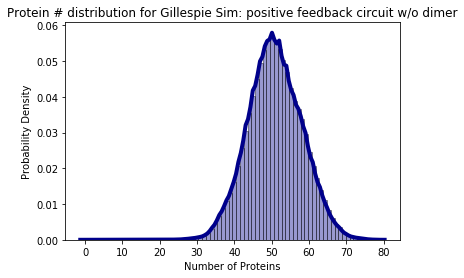

In [67]:
ax = sns.distplot(proteins, hist=True, kde=True, 
             bins=76, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set(xlabel='Number of Proteins', ylabel='Probability Density', title="Protein # distribution for Gillespie Sim: positive feedback circuit w/o dimer")
plt.show()

In [69]:
# CME in matrix form Critical Comparison of MaxCal and 
# Other Stochastic Modeling Approaches in Analysis of Gene Networks paper

# eq 4: dP_i(t)/dt = sum(ij)(W_ij P_j(t))

In [68]:
# left column: time derivative of the state
# =
# matrix: propensities/eq3
# right column: initial conditions

In [71]:
# possible states

# current state
def current_state():
    return (-(g * gene + g_star * (1 - gene))
            -(r * n_a)
            -(n_a * f * gene)
            -(b * (1 - gene)))

# n_a - 1, same gene
def a_m_same_g():
    return (g * gene + g_star * (1 - gene))

# n_a + 1, same gene
def a_p_same_g():
    return (r * (n_a + 1))

# n_a - 1, opposite gene
def a_m_opp_g():
    return (b * gene)

# n_a + 1, opposite gene
def a_p_opp_g():
    return ((n_a + 1) * f * (1 - gene))

In [76]:
max_proteins = 80
gene_states = 2
total_states = max_proteins * gene_states

In [86]:
final_states = np.zeros((total_states))
num_pro_in_state = np.append(np.arange(1, max_proteins+1), np.arange(1, max_proteins+1))
gene_status_in_state = np.append(np.zeros(max_proteins), np.ones(max_proteins))
init_states = np.zeros((total_states))
init_states[max_proteins] = 1
matrix = np.zeros((total_states, total_states))

In [94]:
def fill_matrix():
    for i in range(total_states):
        for j in range(total_states):
            if i == 0 or i == max_proteins:
                # can't have one less protein
                matrix[i, j] = current_state() * 
            if i == (max_proteins - 1) or i == (total_states - 1):
                # can't have one more protein
            else:
                

IndentationError: expected an indented block (<ipython-input-94-53610eb9800d>, line 5)

In [93]:
fill_matrix()

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
